In [1]:
# Authenticating to Twitter via Tweepy
import tweepy
import keys
from operator import itemgetter

# Authenticate to Twitter
auth = tweepy.OAuth1UserHandler(keys.consumer_key, keys.consumer_secret, keys.access_token, keys.access_token_secret)

# Create API object
api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
# Search for tweets using cursor
cursor = tweepy.Cursor(api.search_tweets, q='Earthquake', count=10)

# Get 10 tweets
tweets = []
for tweet in cursor.items(10):
    tweets.append(tweet.text)

for tweet in tweets:
    print(tweet)

Prayers for Turkiye, Syria 

Earthquake with a magnitude of 7.8 has hit Turkiye/Syria and lots of people have lost… https://t.co/gTrn0kRNuK
RT @Terror_Alarm: 🚨🚨🇮🇱🇸🇾 #Breaking: #Syria's Assad officially asked Israel for help following the #earthquake. Request accepted: First Isra…
RT @DeshmukhHarish9: Huge building collapse in a aftershock after #earthquake . 
 #Turkey #TurkiyeDeprem  #Syria #earthquakeinturkey | #زلز…
RT @QuakeAlerts: A magnitude 5.1 earthquake took place 19km WSW of Doğanşehir, Turkey at 13:39 UTC (6 minutes ago). The depth was 10km and…
RT @hogrbe: Watch for additional strong seismic activity in Central Turkey and nearby regions. Aftershocks usually continue for a while aft…
RT @POTUS: I am deeply saddened by the loss of life and devastation caused by the earthquake in Turkiye and Syria. I have directed my team…
RT @Sisodia19Rahul: BREAKING: A 3rd #earthquake  just hit #Turkey  30 minutes ago, this time 7.5 on the Richter scale.
Drone footage: rescu…
RT @xruiztru: 2,

In [3]:
# Trending topics in Paris
trends = api.get_place_trends(615702)

trends_list = [t for t in trends[0]['trends'] if t['tweet_volume']]
trends_list.sort(key=itemgetter('tweet_volume'), reverse=True)

for trend in trends_list[:5]:
    print(trend['name'])

Grammy
Gaziantep
Turkey
Harry Styles
İstanbul


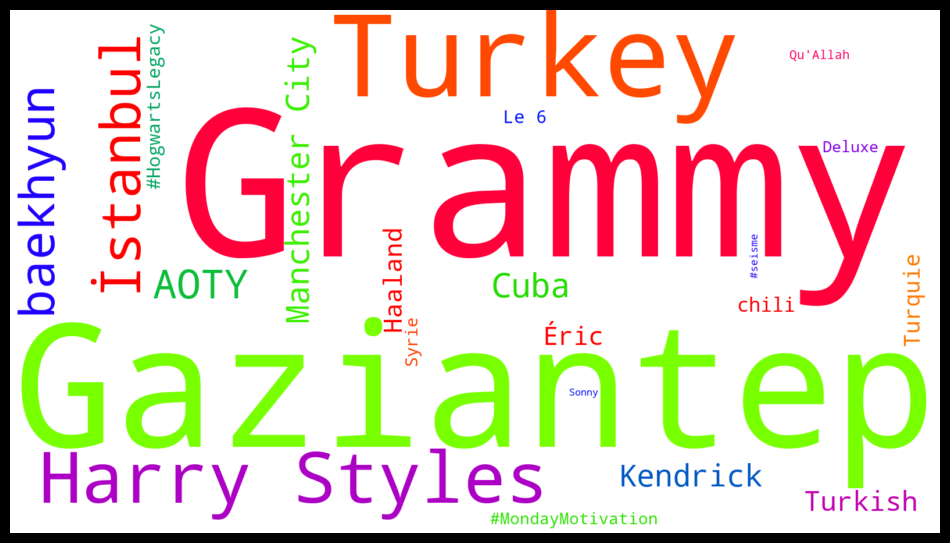

In [4]:
# Create a world cloud from trending topics in Paris

topics = {}

for trend in trends_list:
    topics[trend['name']] = trend['tweet_volume']

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=1600, height=900, prefer_horizontal=0.5, min_font_size=10, colormap='prism', background_color='white').generate_from_frequencies(topics)

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()